**Exercise 1**: 

(a) Reduce the "ZIP-code"-dataset to two dimensions using Oja’s algorithm and plot the point cloud of the data set highlighting each class.

(b) Try one of the previously implemented classifiers (k-NN or Logistic Regression) on the two-dimensional dataset.

In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [18]:
path_to_train = '/content/drive/My Drive/ML_Class_2020/KNN/zip.train'
path_to_test = '/content/drive/My Drive/ML_Class_2020/KNN/zip.test'
training_data = np.array(pd.read_csv(path_to_train, sep=' ', header=None))
test_data = np.array(pd.read_csv(path_to_test, sep =' ',header=None))

X_train, y_train = training_data[:,1:-1], training_data[:,0]
X_test, y_test = test_data[:,1:], test_data[:,0]

In [19]:
# Oja's algorithm:

def oja(X_train):
  # first shuffle data set
  indices = np.random.choice(range(len(X_train)), len(X_train))
  X = X_train[indices]

  # center data set:
  X = X - np.mean(X, axis = 0)
  
  # init w and learning rate
  w = X[0]/np.linalg.norm(X[0])
  lr = 1

  for id, x in enumerate(X[1:],1):
      w = w + lr*w.T@x*(x-w.T@x*w)
      w /= np.linalg.norm(w)
      lr = 1/(id)

  return w

w = oja(X_train)
w_1 = oja(X_train)

# check variance between runs (should be close to one meaning vectors point in the same direction)
# update your learning schedule (of decreasing the lr) lesser variance = better
print(w.T@w_1)

# check if w is actually the principal component:
X_center = X_train - np.mean(X_train, axis = 0)
covariance_matrix = 1/X_center.shape[0]*X_center.T@X_center
U, S , V_t = np.linalg.svd(covariance_matrix)

# is w an eigenvector (if this equals/is close to one/minus one)
w_prime = covariance_matrix@w
w_prime /= np.linalg.norm(w_prime)
print(w.T@w_prime)

# check if w is principal component
print(np.linalg.norm(w.T@V_t[0]))

-0.9968434511980433
0.9980222130884104
0.997333993049939


In [20]:
# calculate second pc:

def reduce(X,w):
  # remove variance in w direction
  X_Tw = X@w
  X_tw_broadcast = np.repeat(np.expand_dims(X_Tw, axis=1), w.shape[0], axis = 1)
  w_broadcast = np.repeat(np.expand_dims(w, axis=1), X.shape[0], axis = 1).T

  X_reduced = X - X_tw_broadcast* w_broadcast
  return X_reduced

X_reduced = reduce(X_train,w)
# second principal component:
w_2 = oja(X_reduced)

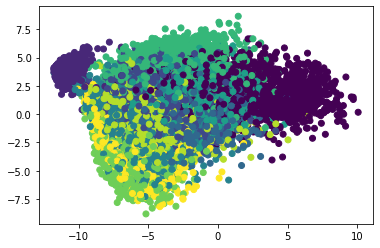

In [21]:
# the plot
W = np.vstack((w,w_2))

X_2D = X_train@W.T

plt.scatter(X_2D[:,0],X_2D[:,1], c = y_train)
plt.show()

In [22]:
# train a classifier on X_2D:
from sklearn.linear_model import LogisticRegression as LR

LR = LR()
LR.fit(X_2D,y_train)
print(LR.score(X_2D,y_train))

print("Pretty bad but still impressive as we reduced the data set from over 200D to 2D")

0.5569880674804554
Pretty bad but still impressive as we reduced the data set from over 200D to 2D


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Exercise 2**: 

Use your implementation of PCA on the greyscale-version of the "LFWcrop Face"-Dataset1.Visualize the first two principal components as Eigenfaces.

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7
image_height: 50
image_width: 37


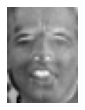

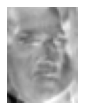

In [23]:
from sklearn.datasets import fetch_lfw_people
import numpy as np
from matplotlib import pyplot as plt


# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)
print("image_height: %d" % h)
print("image_width: %d" % w)


def show_face(X):
    num_samples = 1
    #indices = np.random.choice(range(len(X)), num_samples)
    #print(indices.shape)
    #sample_digits = X[indices]

    fig = plt.figure(figsize=(20, 6))

    for i in range(num_samples):
        ax = plt.subplot(3, 7.5, i + 1)
        img = X.reshape((h, w))
        plt.imshow(img, cmap='gray')
        plt.axis('off')

face_1 = oja(X)
face_2 = oja(reduce(X,face_1))

show_face(face_1)
show_face(face_2)